In [1]:
# Load the peak counts in R
suppressMessages(library(rtracklayer))

R1_peaks_in_ChIP <- import("data/Counts_for_peaks_found_in_ChIP_SELEX_1.txt" , format = "BED")
R1_peaks_NOT_in_ChIP <- import("data/Counts_for_peaks_NOT_found_in_ChIP_SELEX_1.txt" , format = "BED")

R2_peaks_in_ChIP <- import("data/Counts_for_peaks_found_in_ChIP_SELEX_2.txt" , format = "BED")
R2_peaks_NOT_in_ChIP <- import("data/Counts_for_peaks_NOT_found_in_ChIP_SELEX_2.txt" , format = "BED")

R3_peaks_in_ChIP <- import("data/Counts_for_peaks_found_in_ChIP_SELEX_3.txt" , format = "BED")
R3_peaks_NOT_in_ChIP <- import("data/Counts_for_peaks_NOT_found_in_ChIP_SELEX_3.txt" , format = "BED")

Input_peaks_in_ChIP <- import("data/Counts_for_peaks_found_in_ChIP_Input.txt" , format = "BED")
Input_peaks_NOT_in_ChIP <- import("data/Counts_for_peaks_NOT_found_in_ChIP_Input.txt" , format = "BED")

In [2]:
head(R1_peaks_in_ChIP)

GRanges object with 6 ranges and 1 metadata column:
      seqnames      ranges strand |        name
         <Rle>   <IRanges>  <Rle> | <character>
  [1]     chrI 18263-18362      * |         209
  [2]     chrI 19439-19538      * |         925
  [3]     chrI 22178-22277      * |        1352
  [4]     chrI 54981-55080      * |         203
  [5]     chrI 75045-75144      * |         234
  [6]     chrI 89339-89438      * |         270
  -------
  seqinfo: 16 sequences from an unspecified genome; no seqlengths

Get the counts and make a boxplot

In [3]:
R1_counts_in_ChIP <- as.numeric(mcols(R1_peaks_in_ChIP)[,1])
R1_counts_NOT_in_ChIP <- as.numeric(mcols(R1_peaks_NOT_in_ChIP)[,1])

R2_counts_in_ChIP <- as.numeric(mcols(R2_peaks_in_ChIP)[,1])
R2_counts_NOT_in_ChIP <- as.numeric(mcols(R2_peaks_NOT_in_ChIP)[,1])

R3_counts_in_ChIP <- as.numeric(mcols(R3_peaks_in_ChIP)[,1])
R3_counts_NOT_in_ChIP <- as.numeric(mcols(R3_peaks_NOT_in_ChIP)[,1])

Input_counts_in_ChIP <- as.numeric(mcols(Input_peaks_in_ChIP)[,1])
Input_counts_NOT_in_ChIP <- as.numeric(mcols(Input_peaks_NOT_in_ChIP)[,1])

In [4]:
# Add all these counts in a single dataframe, and make a boxplot
df1 <- data.frame(Count = R1_counts_in_ChIP, Selex_round = 1, ChIP = 1)
df2 <- data.frame(Count = R1_counts_NOT_in_ChIP, Selex_round = 1, ChIP = 0)
df3 <- data.frame(Count = R2_counts_in_ChIP, Selex_round = 2, ChIP = 1)
df4 <- data.frame(Count = R2_counts_NOT_in_ChIP, Selex_round = 2, ChIP = 0)
df5 <- data.frame(Count = R3_counts_in_ChIP, Selex_round = 3, ChIP = 1)
df6 <- data.frame(Count = R3_counts_NOT_in_ChIP, Selex_round = 3, ChIP = 0)
df7 <- data.frame(Count = Input_counts_in_ChIP, Selex_round = 0, ChIP = 1)
df8 <- data.frame(Count = Input_counts_NOT_in_ChIP, Selex_round = 0, ChIP = 0)

df <- rbind(df1, df2, df3, df4, df5, df6, df7, df8)

tail(df)

,Count,Selex_round,ChIP
11107,262,0,0
11108,200,0,0
11109,152,0,0
11110,110,0,0
11111,73,0,0
11112,214,0,0


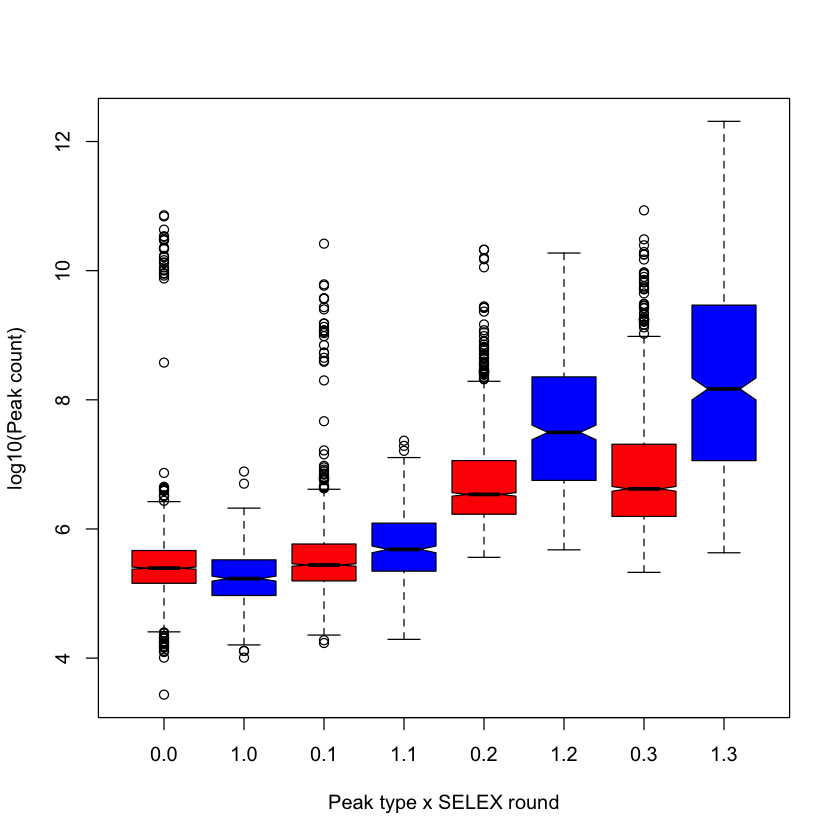

In [5]:
boxplot(log(1+Count) ~ ChIP * Selex_round, data=df, notch=TRUE,
    col=(c("red","blue")),
    ylab="log10(Peak count)", xlab="Peak type x SELEX round")

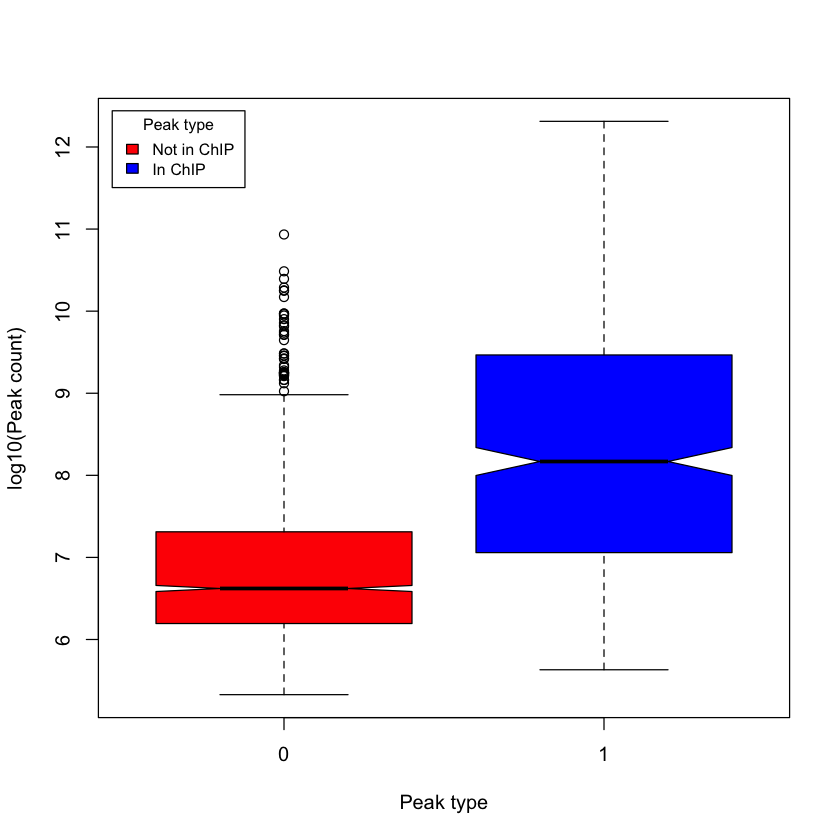

In [6]:
# Plot only the counts from SELEX 3
boxplot(log(1+Count) ~ ChIP, data=df[df$Selex_round == 3,], notch=TRUE,
    col=c("red","blue"),
    ylab="log10(Peak count)", xlab="Peak type")

legend("topleft", inset=.02, title="Peak type",
   c("Not in ChIP", "In ChIP"), fill=c("red","blue"), horiz=FALSE, cex=0.8)

In [7]:
# T-test
t.test(df[df$Selex_round == 3 & df$ChIP == 0, 'Count'],
       df[df$Selex_round == 3 & df$ChIP == 1, 'Count'])


	Welch Two Sample t-test

data:  df[df$Selex_round == 3 & df$ChIP == 0, "Count"] and df[df$Selex_round == 3 & df$ChIP == 1, "Count"]
t = -10.163, df = 500.65, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13337.019  -9015.852
sample estimates:
mean of x mean of y 
  1421.27  12597.71 


We obtained a p-value < 2.2e-16, so we can reject the null hypothesis that the counts have the same mean. In other words, we have a significant diference between the means of the read counts obtained in the two types of peaks (observed also in ChIP-seq data, and observed only in SELEX-seq data). 